<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/rolling_range_Linear_Regression_Angle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


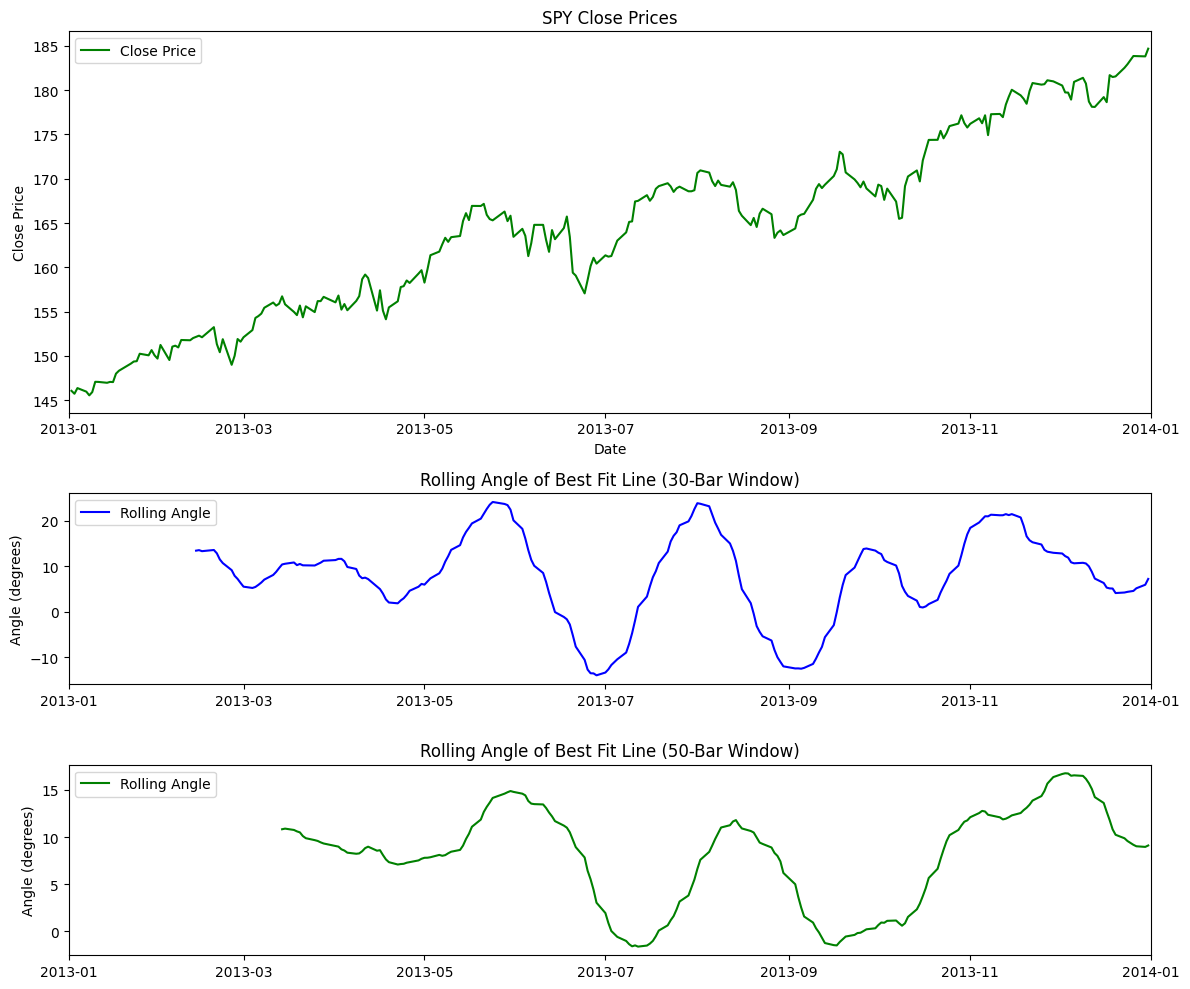

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime
import yfinance as yf

def calculate_slope_angle(x, y):
    """Calculate the angle (in degrees) of the best fit line."""
    A = np.vstack([x, np.ones(len(x))]).T
    m, _ = np.linalg.lstsq(A, y, rcond=None)[0]
    angle = np.degrees(np.arctan(m))
    return angle

def calculate_rolling_angles(data, window):
    """Calculate rolling angles for the given data and window size."""
    angles = []
    for i in range(len(data) - window + 1):
        x = np.arange(window)
        y = data[i:i + window]
        angle = calculate_slope_angle(x, y)
        angles.append(angle)
    return [np.nan] * (window - 1) + angles

def main():
    symbol = "SPY"
    start_date = "2013-01-01"
    end_date = "2014-01-01"
    #end_date = datetime.now().strftime('%Y-%m-%d')
    window_a = 30
    window_b = 50

    # Download SPY data
    df = yf.download(symbol, start=start_date, end=end_date)

    # Calculate rolling angles
    df['Rolling Angle A'] = calculate_rolling_angles(df['Close'], window_a)

    # Calculate rolling angles
    df['Rolling Angle B'] = calculate_rolling_angles(df['Close'], window_b)

    gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])

    # Plot the data
    fig = plt.figure(figsize=(12, 10))
    #plt.figure(figsize=(12, 10))

    # Subplot 1: Close Prices
    #plt.subplot(3, 1, 1)
    ax1 = fig.add_subplot(gs[0])  # Use gs[0] to place in the first (larger) row
    plt.plot(df.index, df['Close'], label='Close Price', color='green')
    plt.title(f'{symbol} Close Prices')
    plt.ylabel('Close Price')
    plt.xlabel('Date')
    plt.legend()

    # Set x-axis limits for rolling angle subplot
    start_date_dt = datetime.datetime(2013, 1, 1)
    end_date_dt = datetime.datetime(2014, 1, 1)
    plt.xlim(start_date_dt, end_date_dt)

    # Subplot 2: Rolling Angle
    #plt.subplot(3, 1, 2)
    ax2 = fig.add_subplot(gs[1])  # Use gs[1] to place in the second (smaller) row
    plt.plot(df.index, df['Rolling Angle A'], label='Rolling Angle', color='blue')
    plt.title(f'Rolling Angle of Best Fit Line ({window_a}-Bar Window)')
    plt.ylabel('Angle (degrees)')
    plt.legend()

    # Set x-axis limits for rolling angle subplot
    start_date_dt = datetime.datetime(2013, 1, 1)
    end_date_dt = datetime.datetime(2014, 1, 1)
    plt.xlim(start_date_dt, end_date_dt)

    # Subplot 3: Rolling Angle
    #plt.subplot(3, 1, 3)
    ax3 = fig.add_subplot(gs[2])  # Use gs[2] to place in the third (larger) row
    plt.plot(df.index, df['Rolling Angle B'], label='Rolling Angle', color='green')
    plt.title(f'Rolling Angle of Best Fit Line ({window_b}-Bar Window)')
    plt.ylabel('Angle (degrees)')
    plt.legend()

    # Set x-axis limits for rolling angle subplot
    start_date_dt = datetime.datetime(2013, 1, 1)
    end_date_dt = datetime.datetime(2014, 1, 1)
    plt.xlim(start_date_dt, end_date_dt)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
